# Opinion Mining Evaluation Forum


#### Data import

In [1]:
import pandas as pd

opinion_df_train = pd.read_table("training_set.txt")
opinion_df_dev = pd.read_table("dev_set.txt")
pd.options.display.max_colwidth = 500

In [2]:
opinion_df_train

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by her hands .,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1
...,...,...
13995,"Yes , Commissioner .",8
13996,The ring !,7
13997,That is my greatest and most enduring love .,5
13998,"When I came back from the war , I had a son .",5


In [3]:
opinion_df_dev

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,"I'm just a little anxious to get up there and whoop ET's ass , that's all .",2
4,Did you think we don't know about your affair with a government official ?,1
...,...,...
995,All I ask of you is be careful .,4
996,"You don't like jazz , pal ?",7
997,Put it on .,1
998,Can you ever imagine [PERSON] being in a spot like that ?,7


### 1. Label Counter

A function `label_counter` that receives a Pandas dataframe and returns the amount of 1-8 emotions in the corpus.

In [4]:
from tqdm import tqdm_notebook as tqdm
def label_counter(dataframe, field):
    """
    Function that receives a dataframe and the field whose labels you want to count, and
    returns the amount of examples with those labels in the Pandas dataframe.
    """    
    return dataframe[field].value_counts()


In [5]:
label_counter(opinion_df_train, "emotion")

1    2999
2    2129
8    2095
5    1470
4    1442
6    1384
3    1343
7    1138
Name: emotion, dtype: int64

In [6]:
label_counter(opinion_df_dev, "emotion")

1    211
2    170
8    158
4    104
5     97
7     96
6     87
3     77
Name: emotion, dtype: int64

### 2: Word Counter

A function `word_counter` that receives a list of strings and returns the (absolute) frequency of each word in that list of strings.

In [7]:
def word_counter(text_list):
    """
    Function that receives a list of strings and returns the (absolute) frequency of each word in that list of strings.
    """
    words_in_df = ' '.join(text_list).split()
    
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq

In [8]:
word_counter(list(opinion_df_train['sentence']))[:25]

.           10600
,            5738
you          3502
I            3208
to           2862
the          2703
?            2696
a            2320
!            1608
[PERSON]     1386
of           1358
and          1266
me           1195
it           1193
that         1156
in           1083
You           950
is            902
for           847
be            761
this          757
I'm           738
have          727
your          690
my            678
dtype: int64

The majority of the words in the top 25 are stopwords... This means that every review will contain words such as 'the' and 'I', etc. Not only these words contain no semantic meaning per se, but they're also not helpful in discriminating the reviews - thus, they give us no clues about the sentiment of a review.

## 3. NLP Pipeline

#### Initial Preprocessing

In a first approach, we will preprocess our data by lowercasing the text, removing all numerical data, and removing all tags (we're also initializing some other preprocessing tools to be used later ).

In [9]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bayaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bayaz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [11]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [13]:
import re

def clean(text_list, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA AND PUNCTUATION
        text = re.sub("[^a-zA-Z]", ' ', text)
        
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates

def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"sentence": list_updated}))

In [14]:
updates = clean(opinion_df_train["sentence"], lemmatize = False, stemmer = False)

C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\3973549115.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm(range(len(text_list))):


  0%|          | 0/14000 [00:00<?, ?it/s]

In [15]:
update_df(opinion_df_train, updates)
opinion_df_train.head(3)

,sentence,emotion
0,i m too old to be traded in,6
1,mother said you could always tell a lady by her hands,8
2,i always said i d leave off when the time came,6


#### Feature extraction

We'll follow a simple **bag-of-words** approach. Each word is a feature. Our feature space is defined by our vocabulary. Documents/pieces of text will be represented as sparse vectors.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(max_df=0.9, binary=True)

In the above call to `CountVectorizer`, we're ensuring that only words whose frequency is below 0.9 are considered (`max_df`), and we're obtaining binary vectors rather than counts (`binary=True`).

In [17]:
X = cv.fit_transform(opinion_df_train["sentence"])
y = np.array(opinion_df_train["emotion"])

In [18]:
X.shape

(14000, 7437)

#### Training the model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Clustering the reviews with a KNN classifier
modelknn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)
modelknn.fit(X,y)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=1,
                     weights='distance')

 Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

From: https://scikit-learn.org/stable/modules/neighbors.html#classification

#### Testing the model

The same preprocessing we applied to the training set must be applied to the development set as well.

In [20]:
updated_dev = clean(opinion_df_dev["sentence"], lemmatize = False, stemmer = False)
update_df(opinion_df_dev, updated_dev)
Dev = cv.transform(opinion_df_dev["sentence"])

C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\3973549115.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm(range(len(text_list))):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
predict = modelknn.predict(Dev)
y = np.array(opinion_df_dev["emotion"])

## 4. Evaluation

In [22]:
import numpy as np
from sklearn.metrics import classification_report

In [23]:
labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness" : 6, "Surprise" : 7, "Trust" : 8}
print (classification_report(predict, y, target_names=labels.keys()))

              precision    recall  f1-score   support

       Anger       0.46      0.34      0.39       288
Anticipation       0.35      0.32      0.33       190
     Disgust       0.04      0.10      0.06        31
        Fear       0.23      0.31      0.26        78
         Joy       0.25      0.26      0.25        93
     Sadness       0.20      0.30      0.24        56
    Surprise       0.19      0.21      0.20        86
       Trust       0.38      0.34      0.36       178

    accuracy                           0.30      1000
   macro avg       0.26      0.27      0.26      1000
weighted avg       0.34      0.30      0.32      1000



In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predict, y)

array([[98, 38, 28, 30, 12, 28, 26, 28],
       [29, 60, 11, 16, 18,  7, 14, 35],
       [12,  2,  3,  1,  5,  4,  4,  0],
       [15, 14,  4, 24,  3,  5,  8,  5],
       [ 9, 11, 10,  5, 24,  8,  8, 18],
       [10,  4,  5,  7,  4, 17,  5,  4],
       [14, 15,  7,  9,  8,  7, 18,  8],
       [24, 26,  9, 12, 23, 11, 13, 60]], dtype=int64)

C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\494762705.py:42: UserWarning: Attempting to set identical bottom == top == 7.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


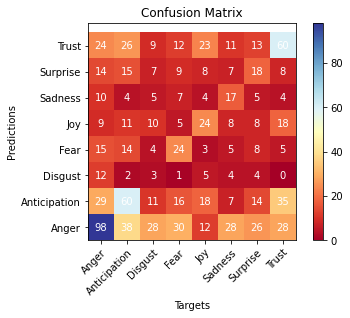

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.RdYlBu)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(predict, y), labels.keys())

## 5. Further preprocessing

### Removing Stopwords

Update the function `clean` to allow the removal of stopwords from the data. We have already defined the stopwords list ealier, in the `stop` variable.

In [26]:
def clean(text_list, lemmatize, stemmer):
    """
    Function that a receives a list of strings and preprocesses it.
    
    :param text_list: List of strings.
    :param lemmatize: Tag to apply lemmatization if True.
    :param stemmer: Tag to apply the stemmer if True.
    """
    
    updates = []
    for j in tqdm(range(len(text_list))):
        
        text = text_list[j]
        
        #REMOVE THAT IS NOT TEXT
        text = re.sub("[^a-zA-Z]", ' ', text)
        
        #REMOVE STOP WORDS
        text = ' '.join([word for word in text.split() if word not in stop])
        
        #LEMMATIZATION
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #STEMMER
        if stemmer:
            text = " ".join(snowball_stemmer.stem(word) for word in text.split())
        
        updates.append(text)
        
    return updates

In [27]:
updates = clean(opinion_df_train["sentence"], lemmatize = True, stemmer = False)

update_df(opinion_df_train, updates)
opinion_df_train

C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\2395442892.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm(range(len(text_list))):


  0%|          | 0/14000 [00:00<?, ?it/s]

,sentence,emotion
0,old traded,6
1,mother said could always tell lady hand,8
2,always said leave time came,6
3,safe,2
4,lay,1
...,...,...
13995,yes commissioner,8
13996,ring,7
13997,greatest enduring love,5
13998,came back war son,5


In [28]:
word_counter(opinion_df_train['sentence'])[:25]

person      1501
get          571
know         564
like         535
want         402
got          387
go           375
come         345
think        338
good         337
right        316
see          309
location     306
one          294
let          279
gonna        275
going        265
well         262
time         252
look         246
u            246
make         243
take         239
man          239
tell         229
dtype: int64

In [29]:
updated_dev = clean(opinion_df_dev["sentence"], lemmatize = True, stemmer = False)

update_df(opinion_df_dev, updated_dev)
opinion_df_dev

C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\2395442892.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm(range(len(text_list))):


  0%|          | 0/1000 [00:00<?, ?it/s]

,sentence,emotion
0,happens gold safe,4
1,natural get cold foot,8
2,lucky,7
3,little anxious get whoop et as,2
4,think know affair government official,1
...,...,...
995,ask careful,4
996,like jazz pal,7
997,put,1
998,ever imagine person spot like,7


#### Evaluate on the development set

In [30]:
cv = CountVectorizer(max_df=0.9, binary=True)

modelknn = KNeighborsClassifier(
    n_neighbors=5, 
    weights='distance', 
    algorithm='brute', 
    leaf_size=30, p=2,        
    metric='cosine', 
    metric_params=None, 
    n_jobs=1
)

X = cv.fit_transform(opinion_df_train["sentence"])
y = np.array(opinion_df_train["emotion"])
modelknn.fit(X,y)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=1,
                     weights='distance')

In [31]:
Dev = cv.transform(opinion_df_dev["sentence"])
Dev.shape

(1000, 6537)

In [32]:
y_dev = np.array(opinion_df_dev["emotion"])
predict = modelknn.predict(Dev)

In [33]:
print(classification_report(predict, y_dev, target_names=labels.keys()))

              precision    recall  f1-score   support

       Anger       0.53      0.31      0.39       353
Anticipation       0.28      0.24      0.26       195
     Disgust       0.08      0.16      0.10        38
        Fear       0.19      0.23      0.21        86
         Joy       0.33      0.36      0.34        89
     Sadness       0.17      0.32      0.22        47
    Surprise       0.15      0.21      0.17        68
       Trust       0.22      0.27      0.24       124

    accuracy                           0.28      1000
   macro avg       0.24      0.26      0.24      1000
weighted avg       0.33      0.28      0.29      1000



C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\494762705.py:42: UserWarning: Attempting to set identical bottom == top == 7.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


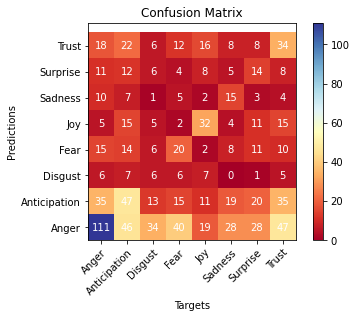

In [34]:
labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness" : 6, "Surprise" : 7, "Trust" : 8}
plot_cm(confusion_matrix(predict, y_dev), labels.keys())

## 6. Naive Bayes Classification

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
#Fit the model
nb=MultinomialNB()
nb=nb.fit(X,y)

In [44]:
#predict
y_dev = np.array(opinion_df_dev["emotion"])
predict = nb.predict(Dev)

In [45]:
print(classification_report(predict, y_dev, target_names=labels.keys()))

              precision    recall  f1-score   support

       Anger       0.64      0.32      0.43       428
Anticipation       0.42      0.37      0.39       195
     Disgust       0.04      0.14      0.06        22
        Fear       0.21      0.42      0.28        52
         Joy       0.37      0.42      0.39        86
     Sadness       0.16      0.28      0.20        50
    Surprise       0.06      0.35      0.11        17
       Trust       0.34      0.36      0.35       150

    accuracy                           0.34      1000
   macro avg       0.28      0.33      0.28      1000
weighted avg       0.46      0.34      0.37      1000



C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\494762705.py:42: UserWarning: Attempting to set identical bottom == top == 7.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


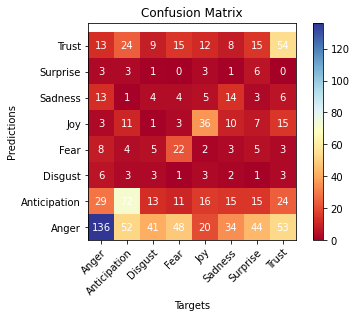

In [46]:
labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness" : 6, "Surprise" : 7, "Trust" : 8}
plot_cm(confusion_matrix(predict, y_dev), labels.keys())

## 7. SVM with linear kernel

In [64]:
# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with linear kernel and C=1000.0
linear_svc=SVC(kernel='linear', C=1000.0) 

In [65]:
# fit classifier to training set
linear_svc = svc.fit(X,y)

In [66]:
#predict
y_dev = np.array(opinion_df_dev["emotion"])
predict = linear_svc.predict(Dev)

In [67]:
print(classification_report(predict, y_dev, target_names=labels.keys()))

              precision    recall  f1-score   support

       Anger       0.74      0.30      0.42       528
Anticipation       0.34      0.38      0.36       152
     Disgust       0.04      0.18      0.06        17
        Fear       0.15      0.39      0.22        41
         Joy       0.31      0.35      0.33        86
     Sadness       0.11      0.29      0.16        35
    Surprise       0.10      0.32      0.16        31
       Trust       0.28      0.40      0.33       110

    accuracy                           0.33      1000
   macro avg       0.26      0.33      0.26      1000
weighted avg       0.52      0.33      0.36      1000



C:\Users\bayaz\AppData\Local\Temp\ipykernel_6064\494762705.py:42: UserWarning: Attempting to set identical bottom == top == 7.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


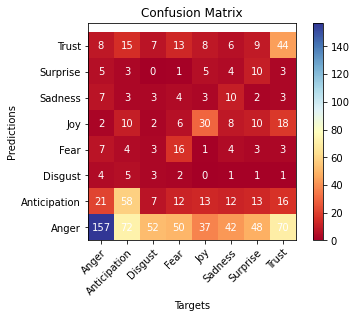

In [68]:
labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, "Sadness" : 6, "Surprise" : 7, "Trust" : 8}
plot_cm(confusion_matrix(predict, y_dev), labels.keys())